https://youtu.be/LNwODJXcvt4?si=7ohYPybmSN-i1kcQ

In [1]:
!nvidia-smi

Thu Apr 24 22:04:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="o67Rlk7e9pd7UVQc0KII")
project = rf.workspace("aya-ldjb1").project("chitr-oynkv")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

New https://pypi.org/project/ultralytics/8.3.115 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/chitr-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

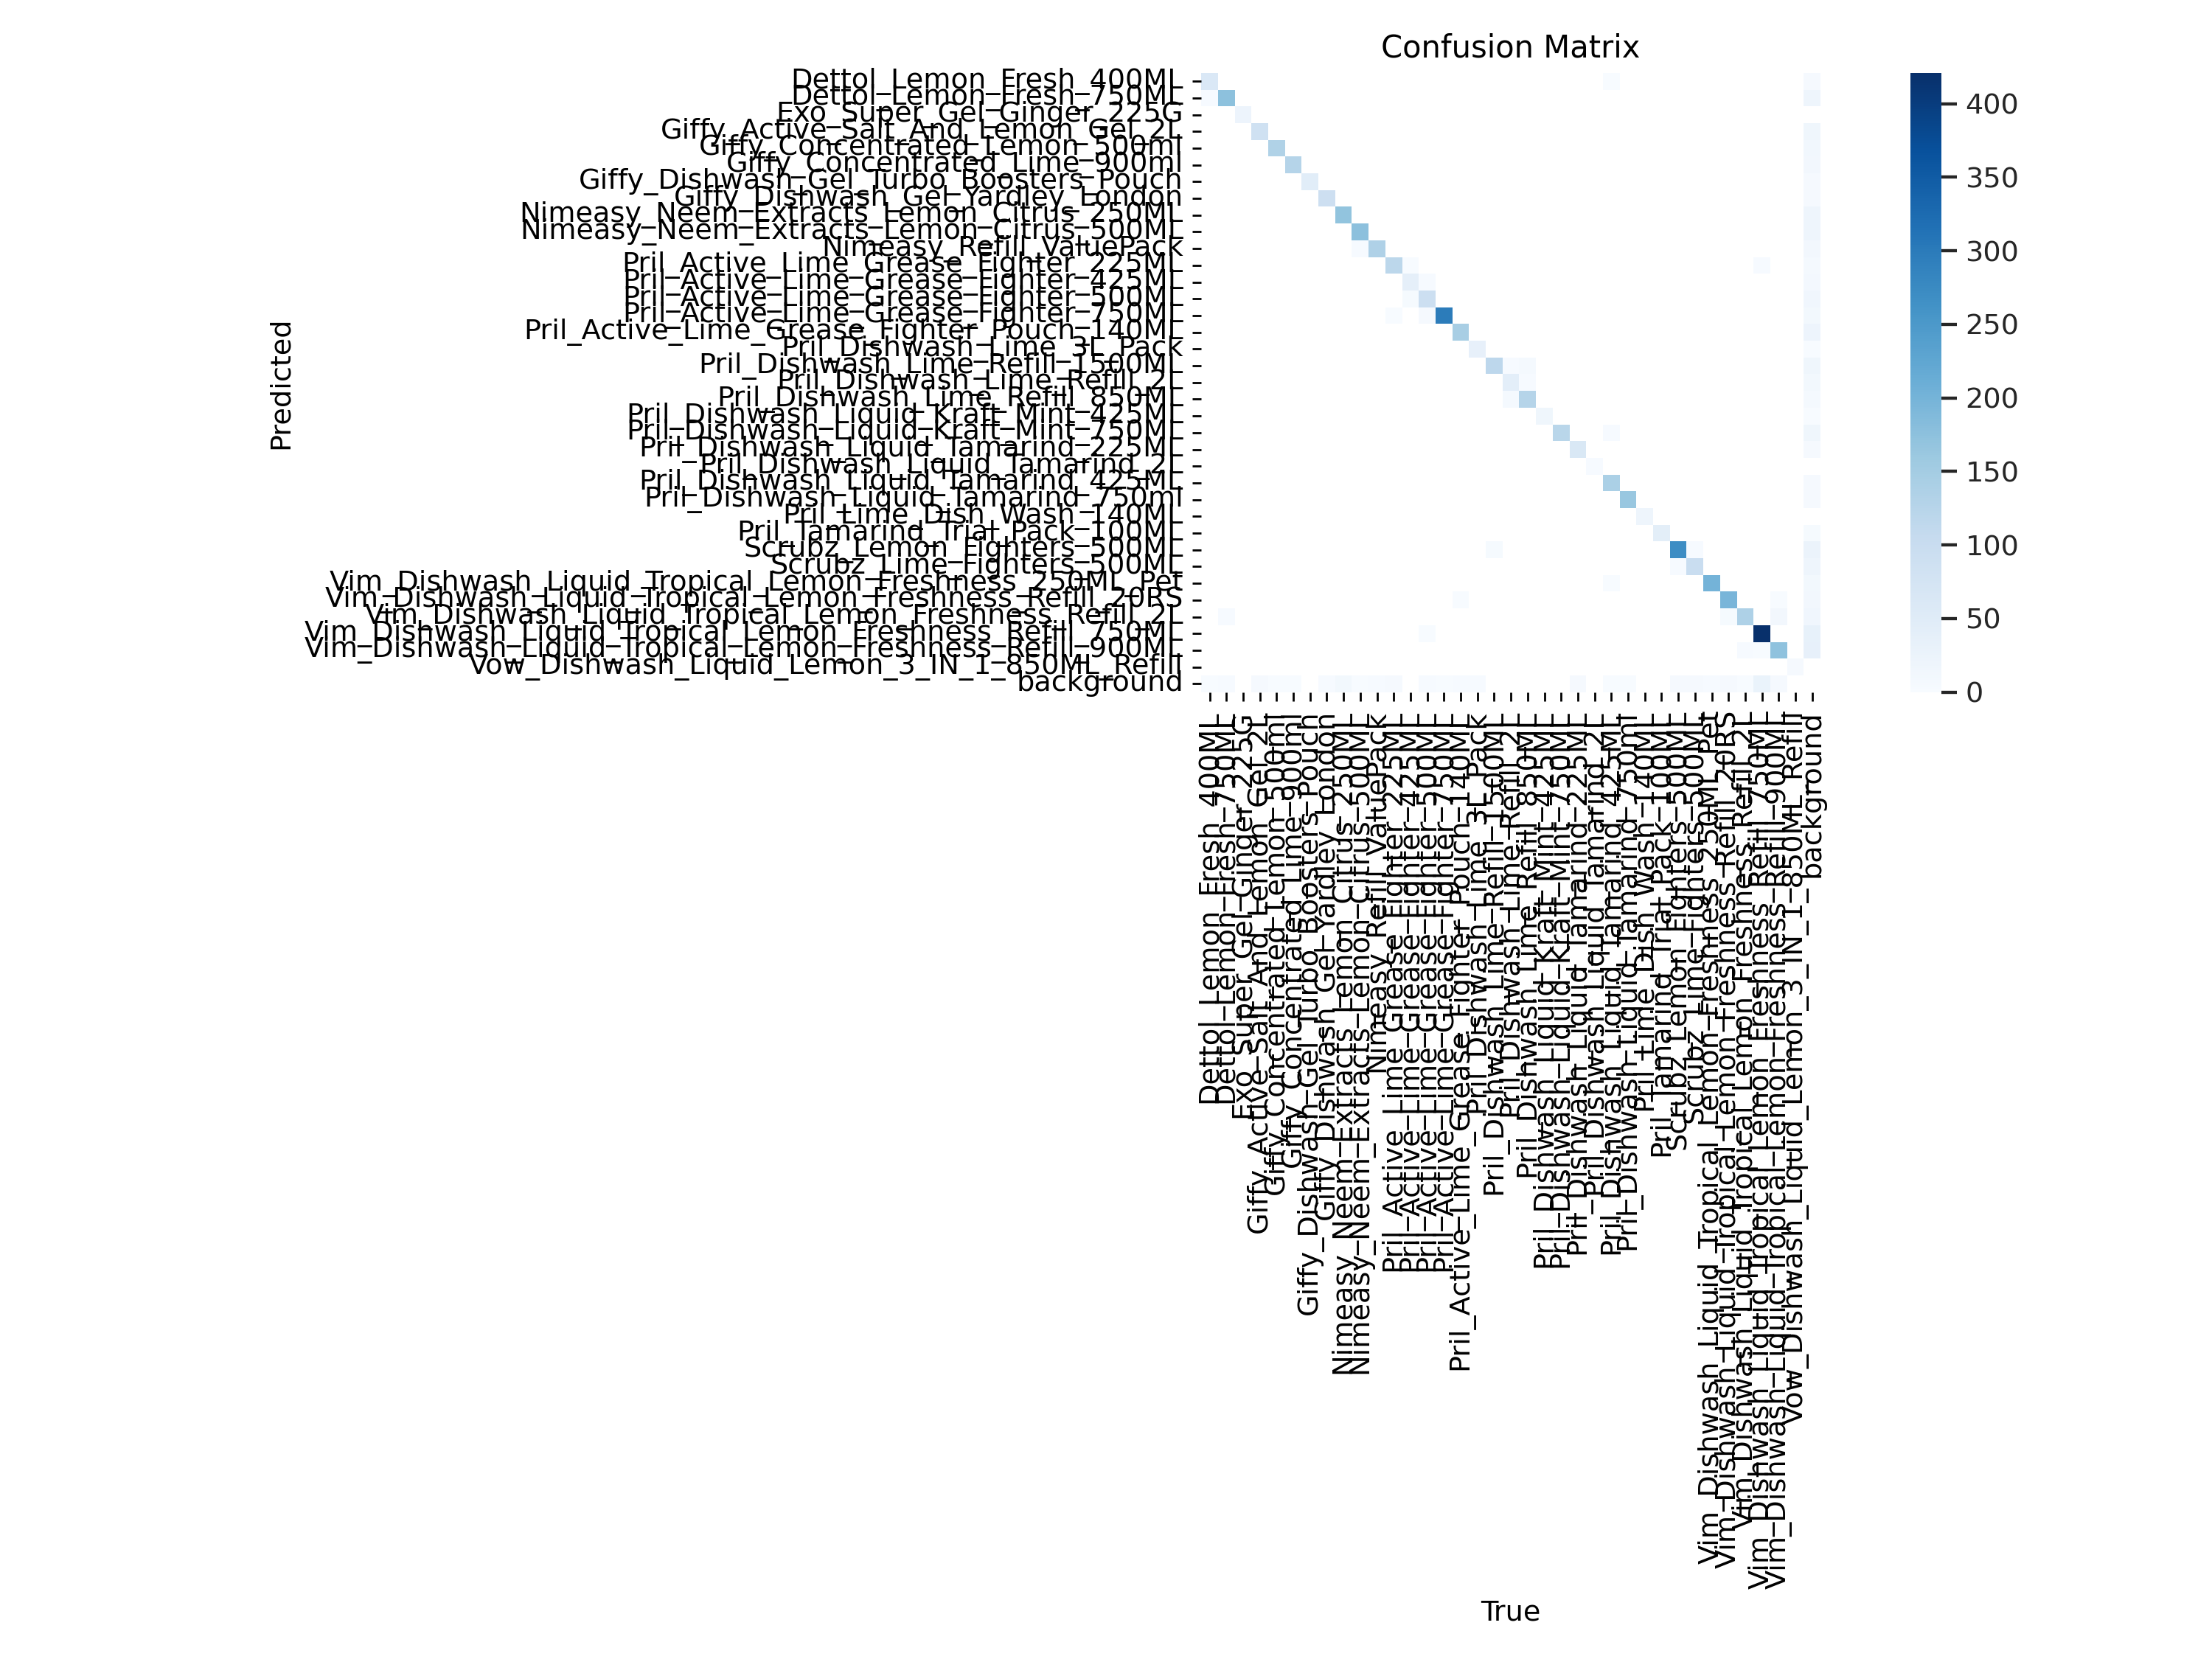

In [8]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=1000)

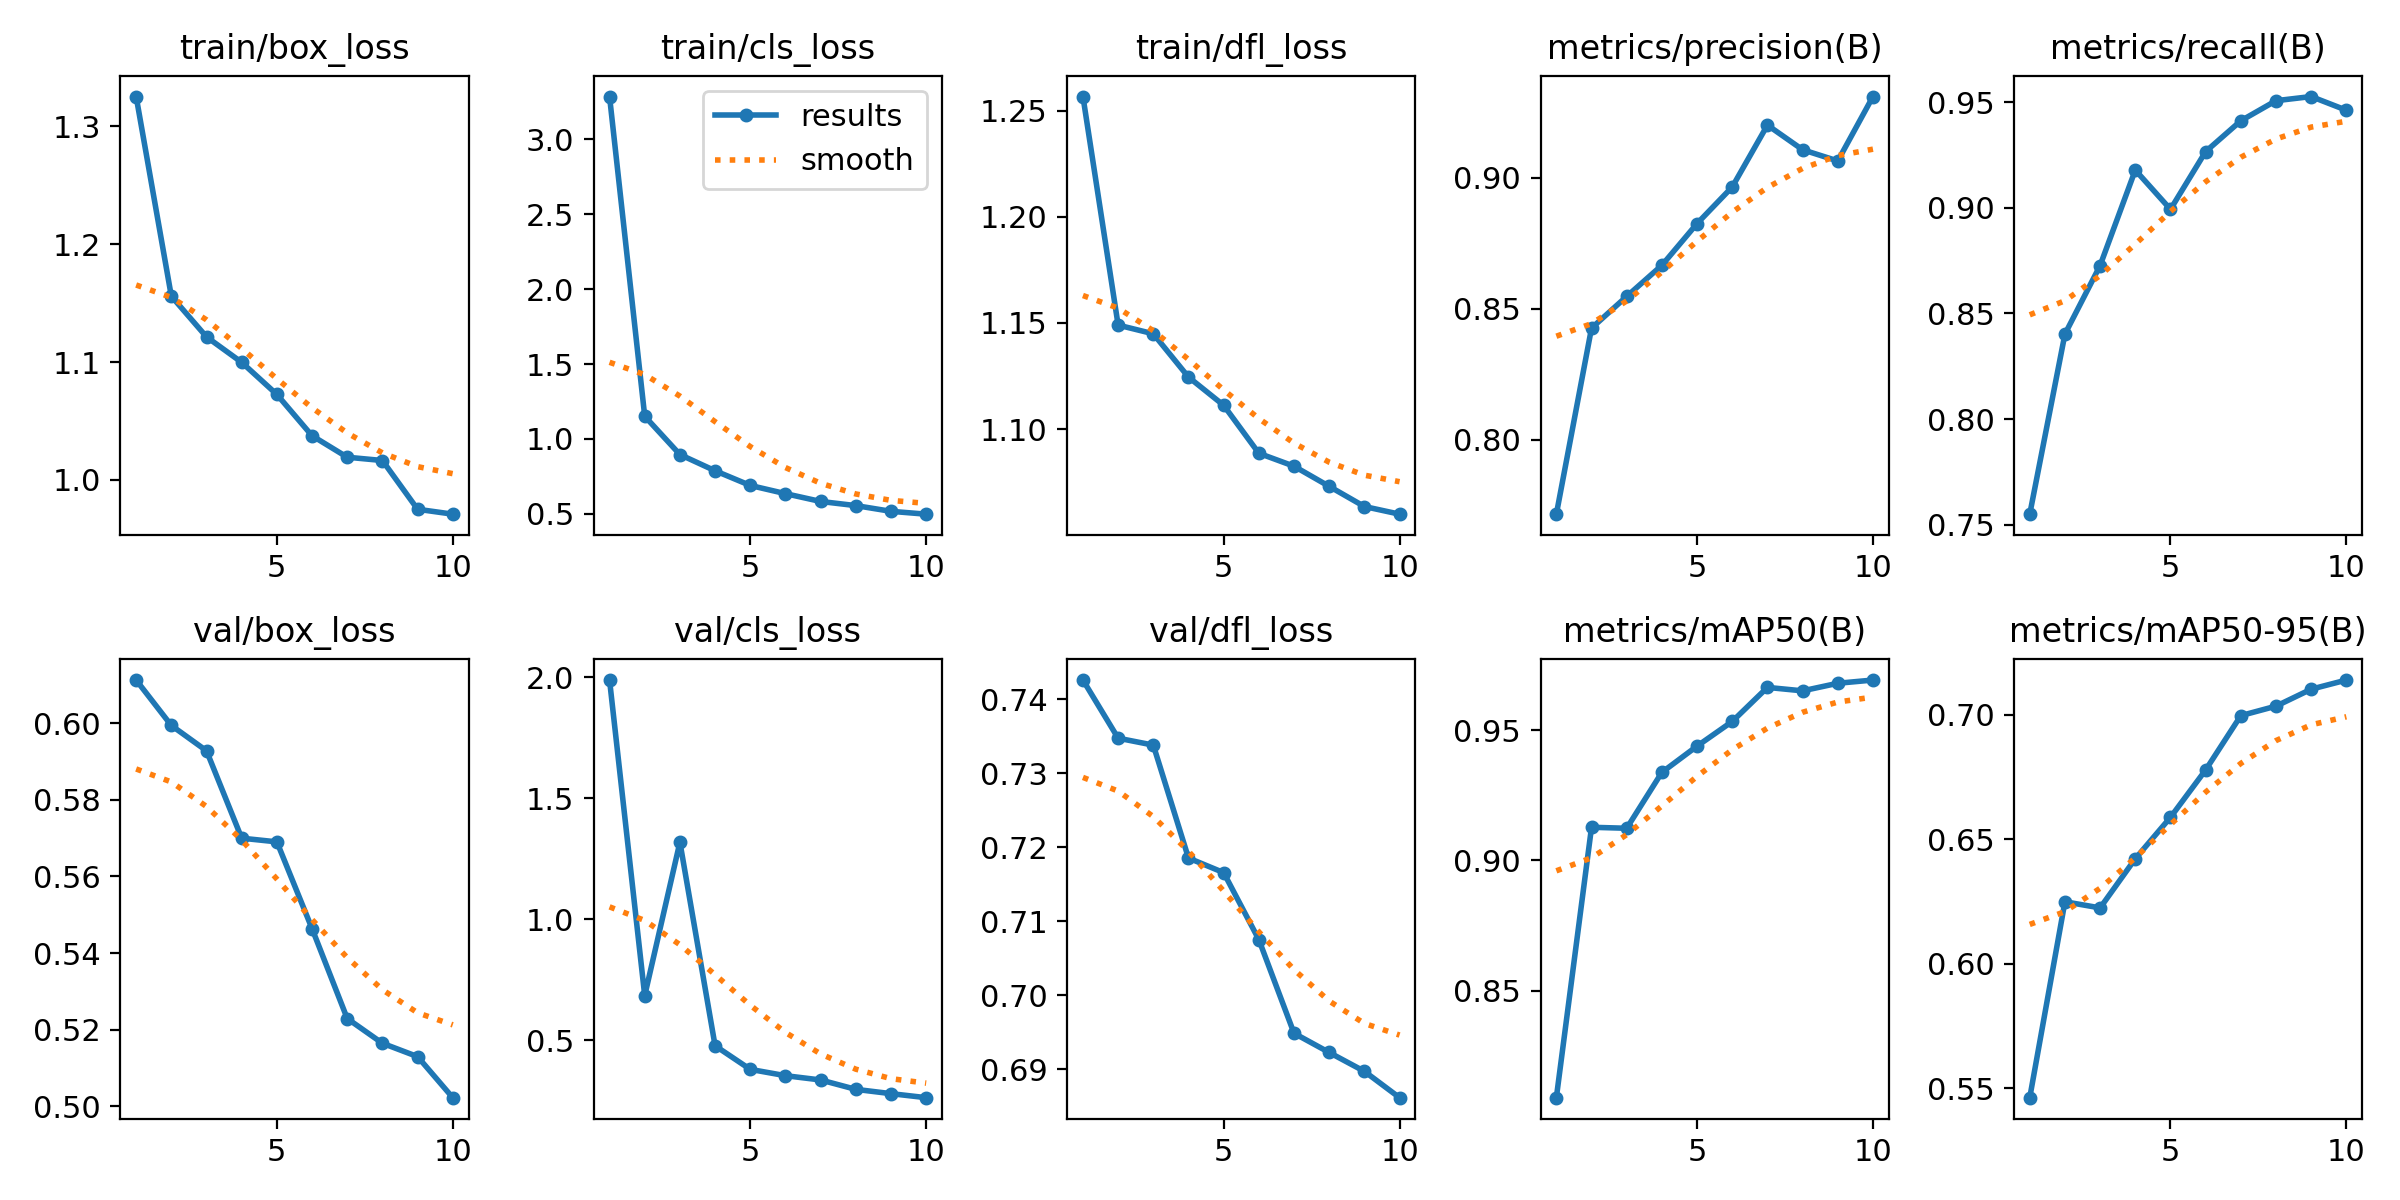

In [10]:
Image(filename='runs/detect/train2/results.png', width=1000)

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs

image 1/83 /content/chitr-2/test/images/1_mp4-0100_jpg.rf.1841bf2ec94f7ad6100d8213b25e42ec.jpg: 640x384 3 Dettol_Lemon_Fresh_750MLs, 2 Giffy_Concentrated_Lime_900mls, 4 Nimeasy_Neem_Extracts_Lemon_Citrus_250MLs, 5 Nimeasy_Neem_Extracts_Lemon_Citrus_500MLs, 4 Nimeasy_Refill_ValuePacks, 1 Pril_Active_Lime_Grease_Fighter_225ML, 5 Pril_Active_Lime_Grease_Fighter_750MLs, 4 Pril_Active_Lime_Grease_Fighter_Pouch_140MLs, 1 Pril_Dishwash_Lime_Refill_850ML, 1 Pril_Dishwash_Liquid_Kraft_Mint_750ML, 1 Pril_Dishwash_Liquid_Tamarind_225ML, 1 Pril_Dishwash_Liquid_Tamarind_425ML, 2 Pril_Dishwash_Liquid_Tamarind_750mls, 1 Scrubz_Lime_Fighters_500ML, 38.3ms
image 2/83 /content/chitr-2/test/images/1_mp4-0122_jpg.rf.46ef6b2207c6dc7ce8a80a8da7292769.jpg: 640x384 3 Dettol_Lemon_Fresh_750MLs, 2 Giffy_Concentrated_Lime_900mls, 3 Nimeasy_Nee

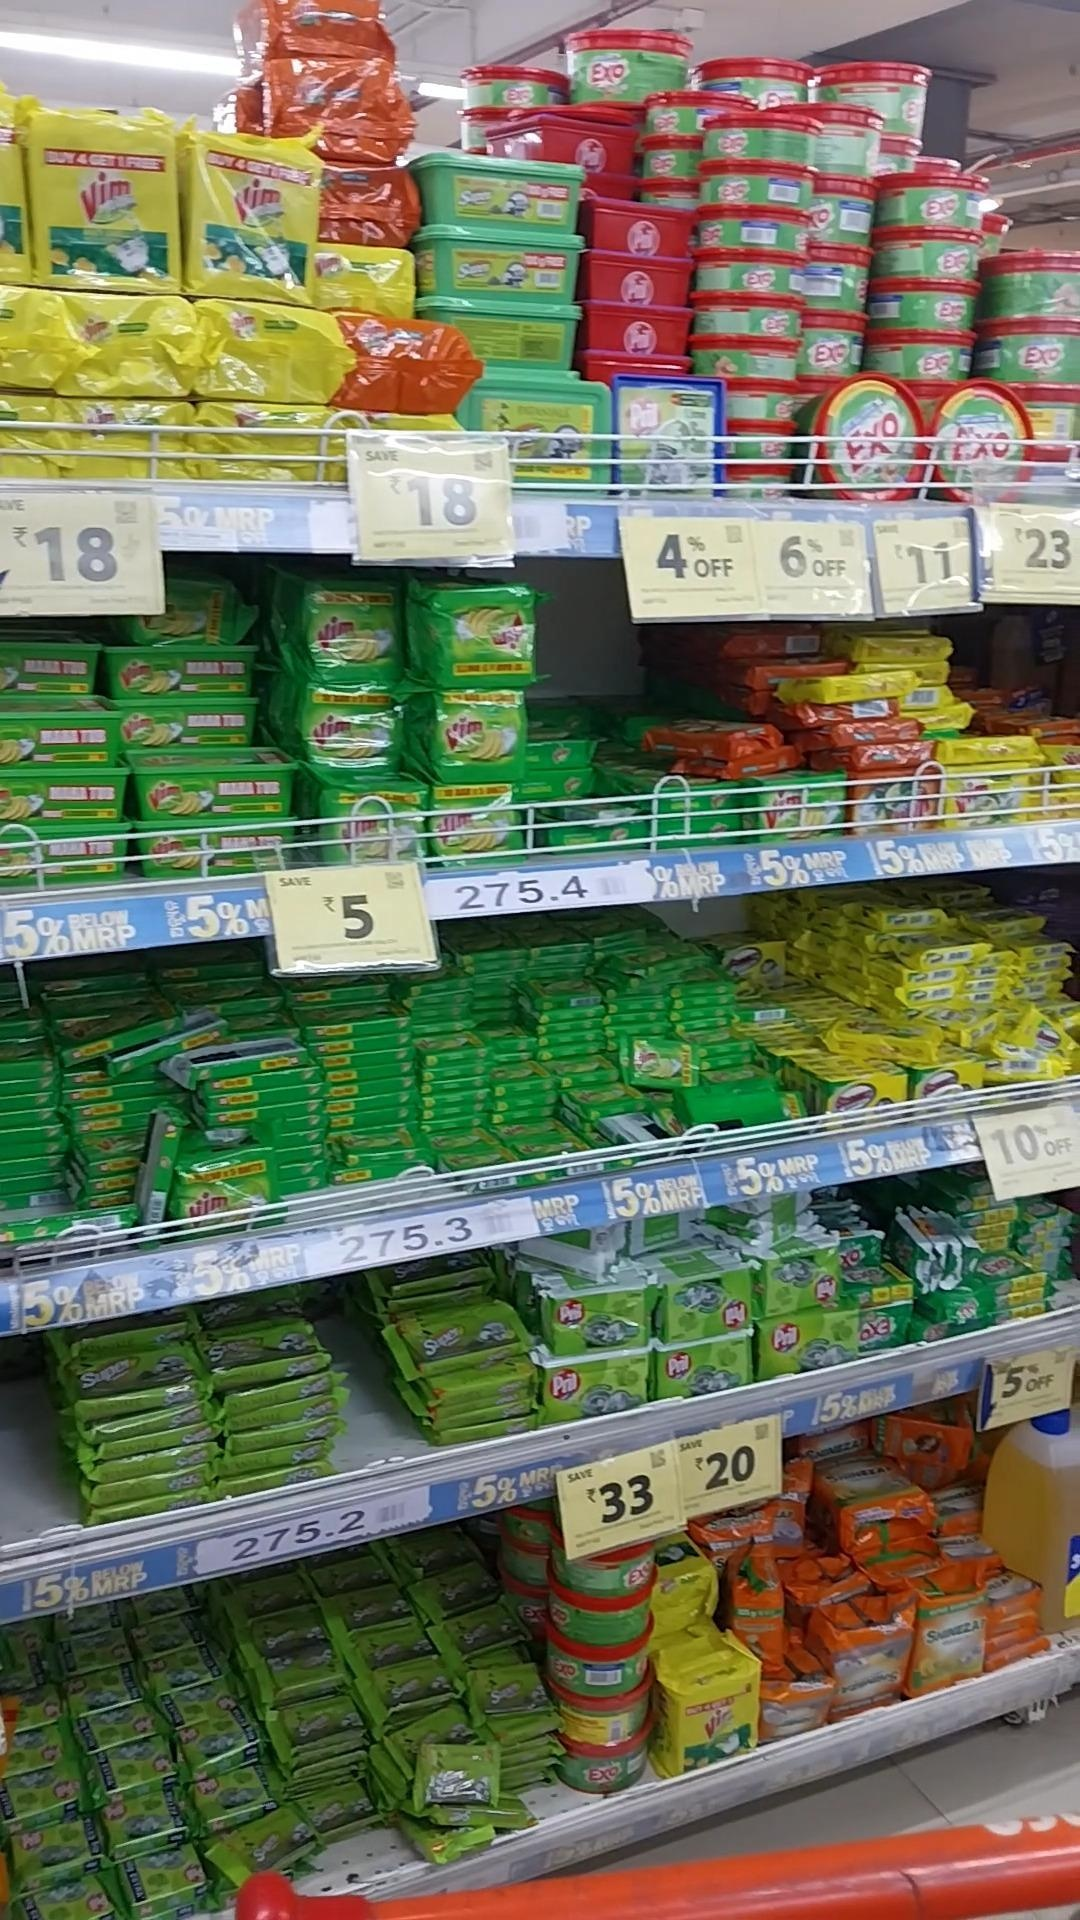

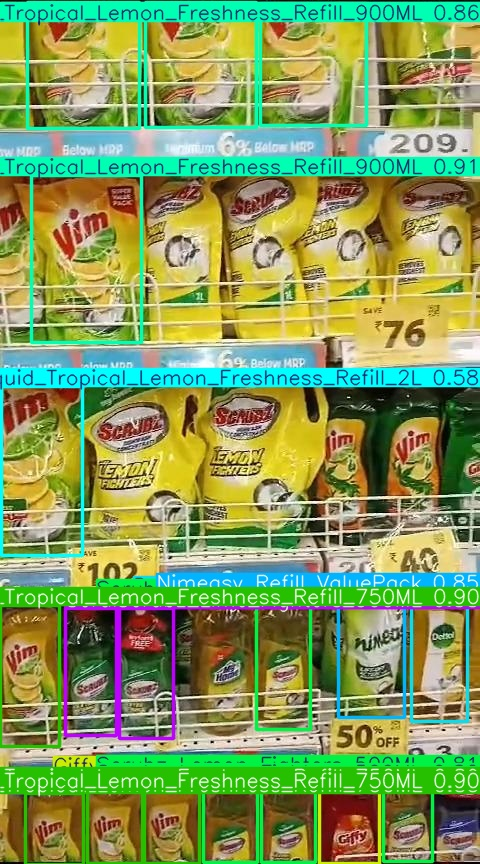

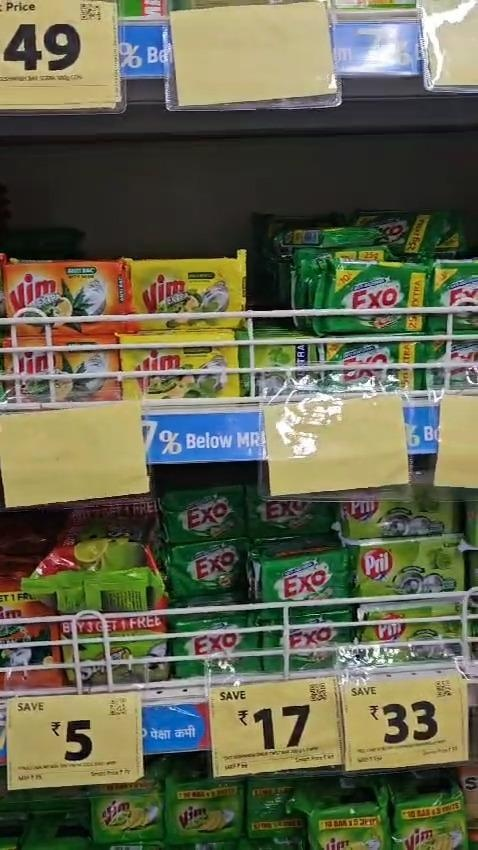

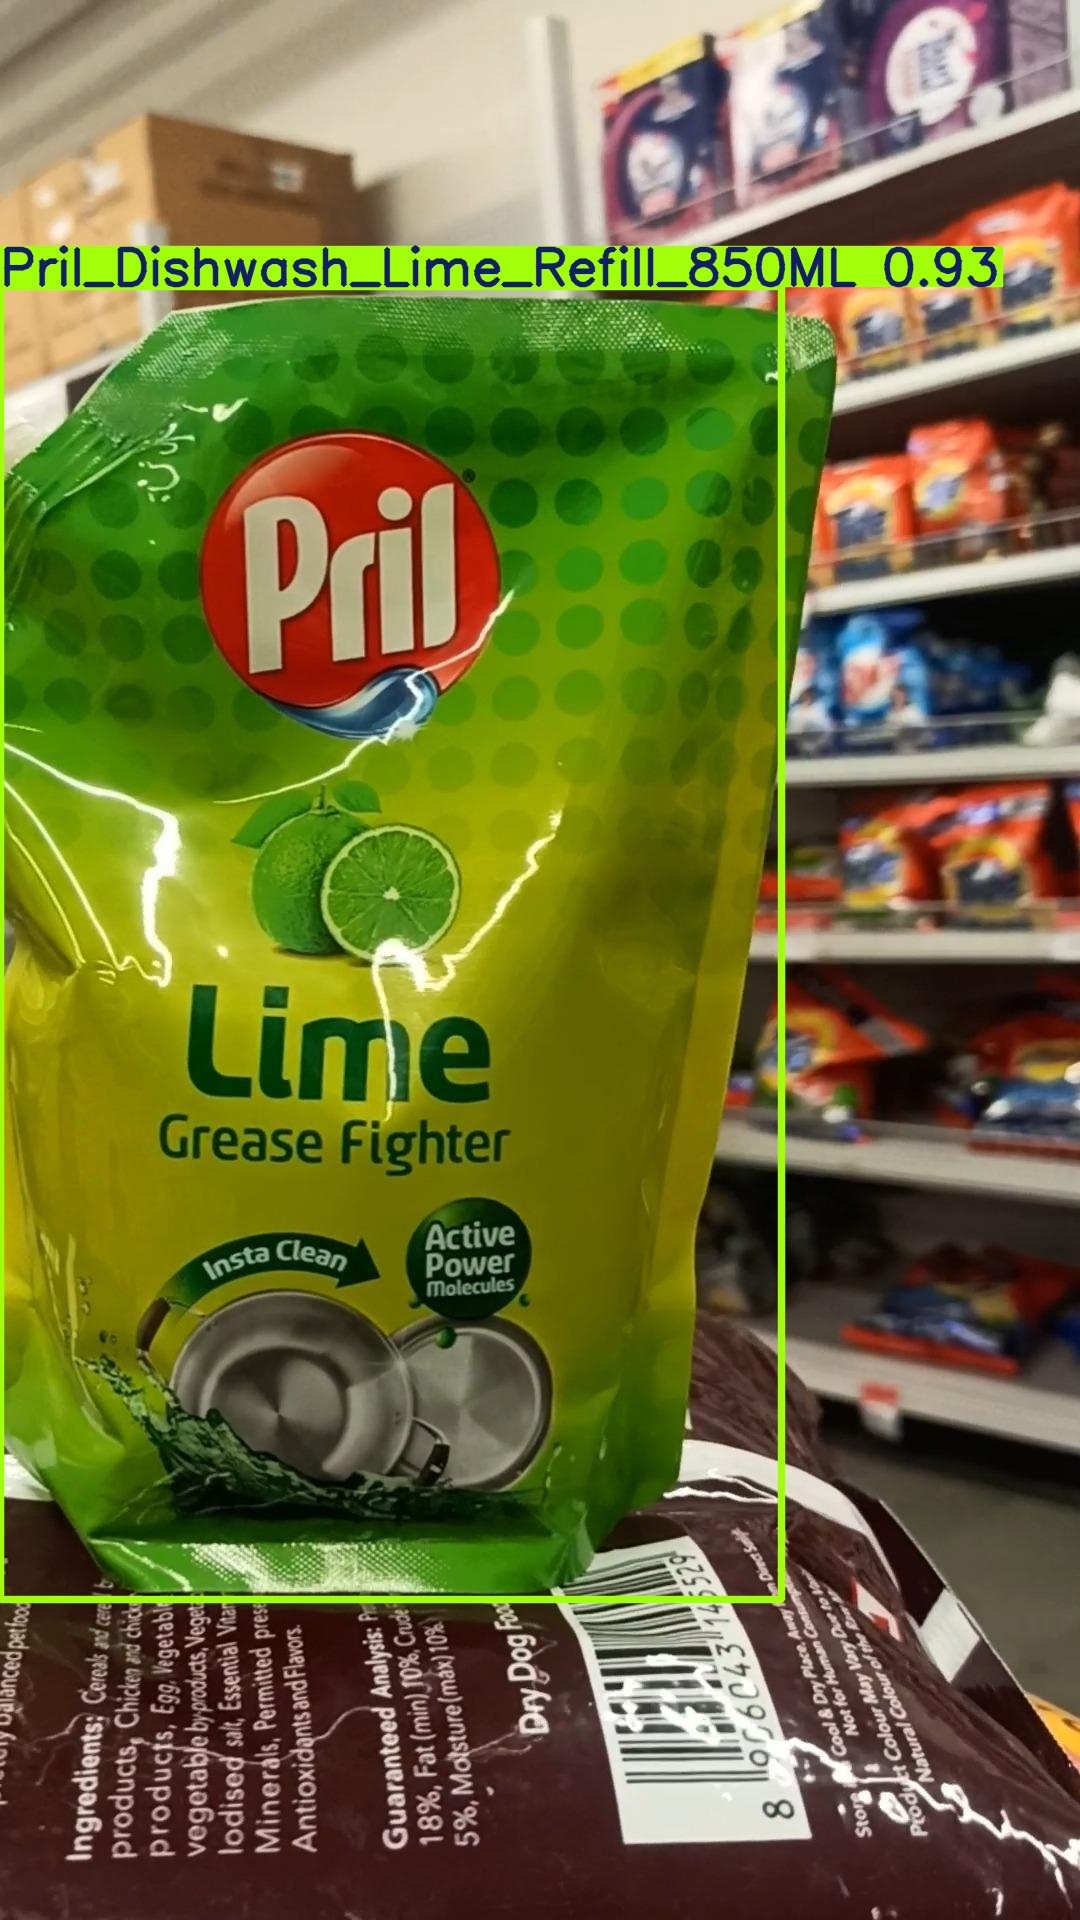

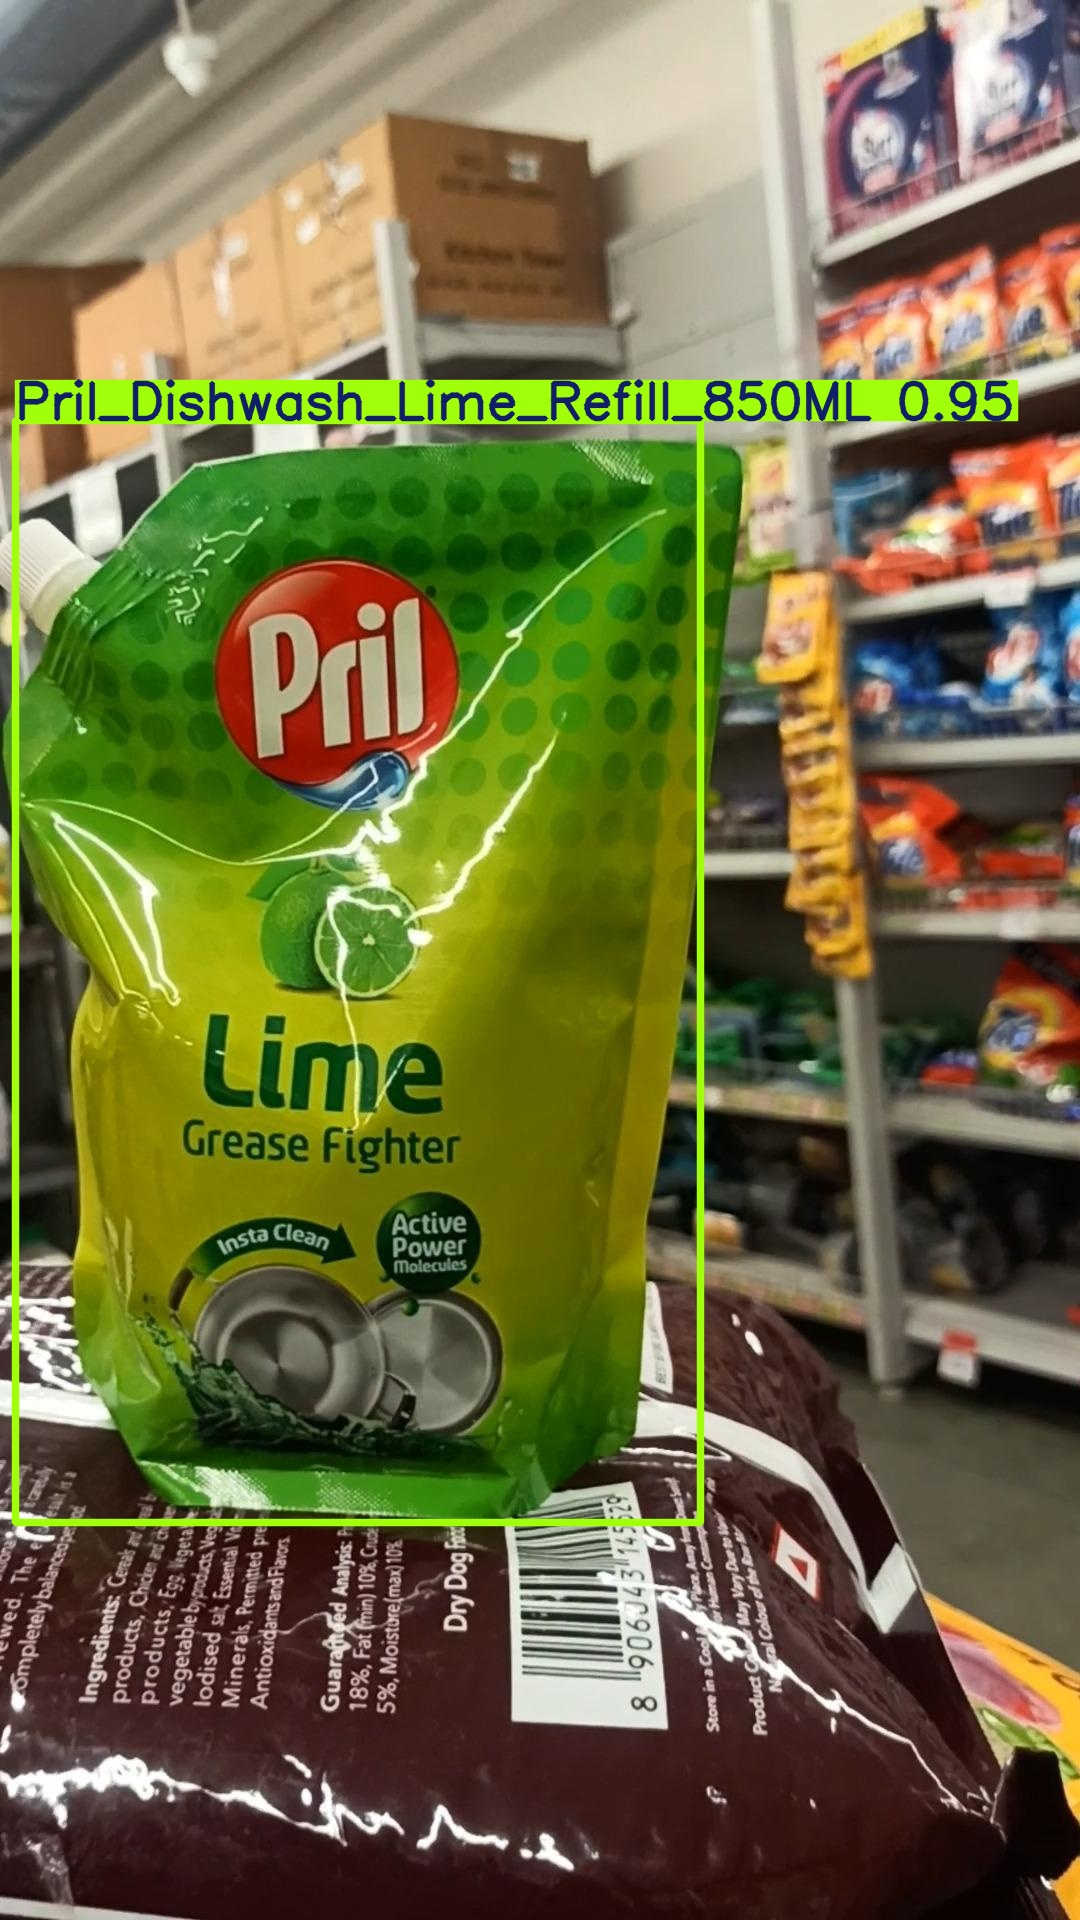

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")